# Plots VR MPC and RBC for 26/11/2020

This notebook contains plots used in Ch6 of the thesis for the simulation section for Voltage Regulation Mode


In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import dates
import matplotlib
import numpy as np
import seaborn as sns
import os

In [110]:
#eco = pd.read_csv('CSV/RBC_20min_DRH_2020-11-26.csv', index_col=0)
eco = pd.read_csv(f'CSV/RBC_Results.csv', index_col=0)
eco.index = pd.to_datetime(eco.index, format='%Y-%m-%d %H:%M:%S')

In [111]:
eco['soc'] = (eco['soc']/13.8)*100

In [112]:
os.chdir('/home/brendan/PhD/Python Scripts/ThesisGit/Dist Network Simulations')

In [113]:
#vreg = pd.read_csv('Voltage_Regulation_20min_26-22-2020_7am_7pm.csv', index_col=0)
#vreg = pd.read_csv('CSV/Voltage_Regulation_20min_26-22-2020_7am_6pm.csv', index_col=0)
vreg = pd.read_csv('Results/VRmode_20min_DRH_2020-11-26_9am_4pm.csv', index_col=0)
vreg.index = pd.to_datetime(vreg.index, format='%Y-%m-%d %H:%M:%S')

In [114]:
os.chdir('/home/brendan/PhD/Python Scripts/ThesisGit/Time Series Plots')

In [115]:
dt = 1/3

In [116]:
def plot_electrical3(df_results, sim):
    
    sns.set(font_scale=1.35, rc={'figure.figsize':(12,5)})
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    matplotlib.rcParams['font.family'] = 'Abyssinica SIL'
    
    
    fig = plt.figure(figsize=(12,8))
    
    gs=GridSpec(3,1) # 2 rows, 3 columns

    ax1=fig.add_subplot(gs[0,0]) # First row, first column
    ax2=fig.add_subplot(gs[1:,0]) # First row, second column
    
    ax2.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))

    
    load =  ax2.plot(df_results.index, df_results['load'], label='$p_i^l$', lw=1, color='red', ls=(0, (3, 1, 1, 1)))
    pv =  ax2.plot(df_results.index, df_results['pv'], label='$p_i^p$', lw=1, color='blue', ls=(0, (5, 5)))
    im =  ax2.plot(df_results.index, df_results['p_im'], label='$p_i^i$', lw=1, color='grey', ls='-.')
    ex =  ax2.plot(df_results.index, df_results['p_ex'], label='$p_i^e$', lw=1, color='orange', ls=(0, (3, 1, 1, 1, 1, 1)))
    ch =  ax2.plot(df_results.index, df_results['p_ch'], label='$p_i^c$', lw=1.5,color='black', ls='dotted')
    dis =  ax2.plot(df_results.index, df_results['p_dis'], label='$p_i^d$', lw=1, color='green')
    hvac = ax2.plot(df_results.index, df_results['p_hvac'], label='$p_i^h$', lw=1, color='purple', ls=(0, (5, 1)))
    ax2.set_ylim(-7000,12000)
     
    soc = ax1.plot(df_results.index, df_results['soc'], label='$SoC$', lw=1, color='blue', ls='--')
    ax1.set_ylim(-10,120)
    
    ax3 = ax1.twinx()
    ax3.set_ylabel('Cost ($/kWh)')
    ax3.set_ylim(0,0.4)
    tou = ax3.plot(df_results.index, df_results['tou'], label='$ToU$', lw=1, color='red',)
    ax3.grid()
    
    ax2.set_xlabel('Time')
    ax1.set_ylabel('SoC (%)')
    ax1.get_shared_x_axes().join(ax1, ax2)
    ax1.set_xticklabels([])
    ax2.set_ylabel('Power (W)')
    
    ax2.legend(loc="upper left", ncol=7)
    ax1.legend(loc="upper left")
    ax3.legend(loc="upper right")
    ax1.autoscale(enable=True, axis='x', tight=True)
    
    plt.savefig(f'Figures/26-11-2020_{sim}_electrical.pdf')

In [117]:
def plot_thermal_combined2(mpc_data, rbc_data):
    
    sns.set(font_scale=1.35, rc={'figure.figsize':(12,5)})
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    matplotlib.rcParams['font.family'] = 'Abyssinica SIL'
    
    fig, ax = plt.subplots(2, sharex=True)
    
    for x in ax:
        x.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
    
    ax[0].set_ylabel('Temperature ($^\circ$C)')
    ax[0].set_ylim(15,35)
    ax[0].set_xlim(mpc_data.index[0],mpc_data.index[-1])
    ax[0].plot(mpc_data.index, mpc_data['T_i'], color='red', lw=2, ls='--')
    ax[0].plot(mpc_data.index, rbc_data['T_i'], color='black', lw=2, ls=(0, (3, 1, 1, 1, 1, 1)))
    ax[0].plot(mpc_data.index, mpc_data['t_ext'], color='green', ls='-.')
    #ax[0].plot(mpc_data.index, mpc_data['t_bed'])
    ax[0].plot(mpc_data.index, mpc_data['set_point'], color='grey')
    ax[0].legend(['MPC $T_i^i$', 'RBC $T_i^i$', '$T_a$', 'Set Point'], loc="upper left", ncol=4)
    
    
    
    #Plot Results
    
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Cooling (kW) \n Solar Irradiance (kW/m$^2$)')
    ax[1].set_ylim(0,10)
    #ax1.plot(df_results.index, df_results['phi_h_heat'], color='red')
    ax[1].plot(mpc_data.index, -mpc_data['phi_h_cool'], color='red', alpha=0.75, )
    ax[1].plot(mpc_data.index, -rbc_data['phi_h_cool'], color= 'black', ls=(0, (3, 1, 1, 1, 1, 1)))
    ax[1].plot(mpc_data.index, mpc_data['ghi']/1000, color='blue', ls='--')
    ax[1].legend(['MPC $\Phi_i^c$', 'RBC $\Phi_i^c$', 'GHI'], loc="upper left", ncol=1)



    fig.tight_layout()
    fig.set_figheight(7.5)
    fig.set_figwidth(12)# otherwise the right y-label is slightly clipped
    #ax.grid()
    
    plt.savefig('Figures/26-11-2020_VoltageReg_ThermalComparison_MPC_RBC.pdf')
    ax[0].autoscale(enable=True, axis='x', tight=True)
    ax[1].autoscale(enable=True, axis='x', tight=True)
    plt.show()

In [134]:
def mpc_energy_df(mpc_results):
    mpc_energy = mpc_results['2020-11-23':'2020-11-29'][['p_load', 'pv', 'p_hvac', 'p_im', 'p_ex', 'p_ch', 'p_dis', 
                      'cost', 'payment']].resample('d').sum()
    
    mpc_energy[['p_load', 'pv', 'p_im', 'p_ex', 'p_ch', 'p_dis','p_hvac']] = (mpc_energy[['p_load', 'pv', 'p_im', 'p_ex', 'p_ch', 'p_dis','p_hvac']])/(1000)*dt
    
    mpc_energy.loc['Total'] = mpc_energy.sum()
    
    #print(mpc_energy)
    
    mpc_energy['bill'] = mpc_energy['cost'] + mpc_energy['payment']
    
    return mpc_energy

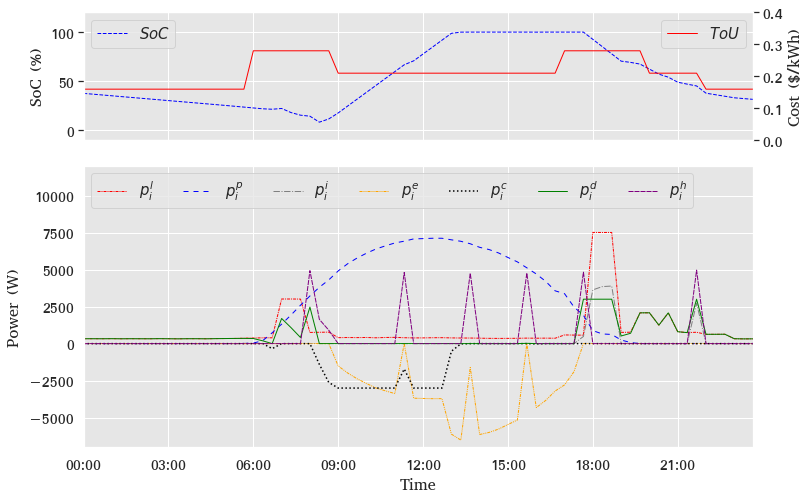

In [119]:
plot_electrical3(eco['2020-11-26'], 'rbc')

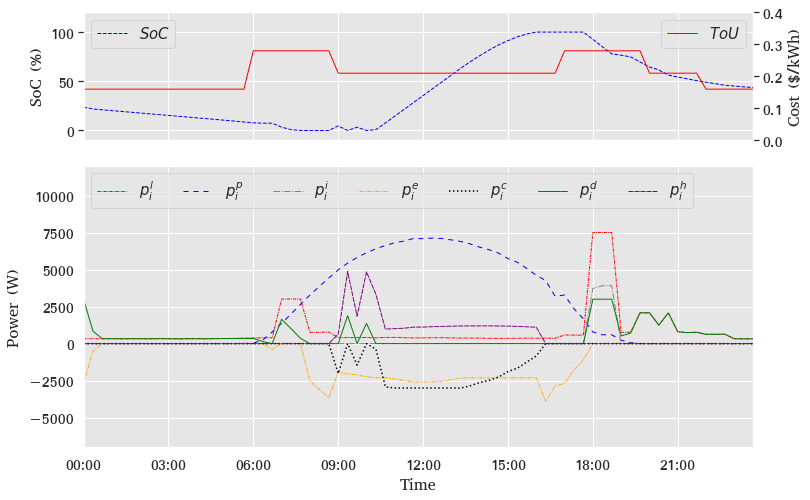

In [120]:
plot_electrical3(vreg['2020-11-26'], 'vreg_mode')

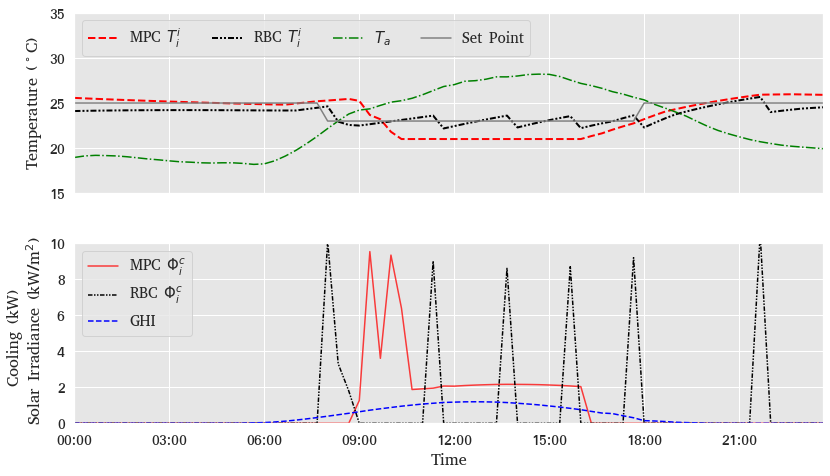

In [121]:
plot_thermal_combined2(vreg['2020-11-26'], eco['2020-11-26'])

In [126]:
eco.loc['2020-11-26 9:00:00':'2020-11-26 15:40:00']['p_ex'].min()

-6513.990895526414

In [127]:
vreg.loc['2020-11-26 9:00:00':'2020-11-26 15:40:00']['p_ex'].min()

-2601.774591753687

In [135]:
eco_energy = mpc_energy_df(eco.loc['2020-11-26'])
eco_energy

,p_load,pv,p_hvac,p_im,p_ex,p_ch,p_dis,cost,payment,bill
2020-11-26 00:00:00,32.611288,58.078089,10.529943,4.862076,-30.569385,-13.208845,13.449354,1.297604,-3.362632,-2.065028
Total,32.611288,58.078089,10.529943,4.862076,-30.569385,-13.208845,13.449354,1.297604,-3.362632,-2.065028


In [136]:
vreg['p_load'] = vreg['load']
vreg['cost'] = ((vreg['p_im']/1000)*dt)*vreg['tou']
vreg['payment'] = ((vreg['p_ex']/1000)*dt)*vreg['fit']

In [137]:
vreg_energy = mpc_energy_df(vreg.loc['2020-11-26'])
vreg_energy

,p_load,pv,p_hvac,p_im,p_ex,p_ch,p_dis,cost,payment,bill
2020-11-26 00:00:00,22.08125,57.930021,11.618293,3.849104,-25.498431,-15.526284,12.945132,1.077749,-2.804827,-1.727078
Total,22.08125,57.930021,11.618293,3.849104,-25.498431,-15.526284,12.945132,1.077749,-2.804827,-1.727078


In [139]:
eco_energy = mpc_energy_df(eco.loc['2020-11-26 9:00:00':'2020-11-26 15:40:00'])
eco_energy

,p_load,pv,p_hvac,p_im,p_ex,p_ch,p_dis,cost,payment,bill
2020-11-26 00:00:00,7.491446,44.458806,4.775002,0.0,-25.224839,-11.749031,0.006511,0.0,-2.774732,-2.774732
Total,7.491446,44.458806,4.775002,0.0,-25.224839,-11.749031,0.006511,0.0,-2.774732,-2.774732


In [140]:
vreg_energy = mpc_energy_df(vreg.loc['2020-11-26 9:00:00':'2020-11-26 15:40:00'])
vreg_energy

,p_load,pv,p_hvac,p_im,p_ex,p_ch,p_dis,cost,payment,bill
2020-11-26 00:00:00,2.717833,44.483325,11.249305,-1.682903e-32,-16.350771,-15.248544,1.083128,-1.232595e-32,-1.798585,-1.798585
Total,2.717833,44.483325,11.249305,-1.682903e-32,-16.350771,-15.248544,1.083128,-1.232595e-32,-1.798585,-1.798585


In [ ]:
vreg_energy.round(2).to_latex()

In [ ]:
eco.loc['2020-11-26']['p_im'].plot()

In [ ]:
vreg.loc['2020-11-26']['p_im'].plot()